# Introduction
### Group Members:
1. Pooi Jerome (JPOOI001@e.ntu.edu.sg)
2. Raksha Ramachandran (RAKSHA005@e.ntu.edu.sg)
3. Parvez Kurniawan Wijaya (PARVEZ001@e.ntu.edu.sg)
4. Sivakumar Madhumitha (Madhumit008@e.ntu.edu.sg)
5. Owen Lim Qi Xun (OWEN0010@e.ntu.edu.sg)


# **Decomposition**

The goal of decomposition is to break the task down into its individual parts.

### 1. Data Loading

- Load Student Data
- Data Validation
- Organize by Tutorial Groups

### 2. Defining Allocation Criteria

- Team Size
- Diversity Constraints
  - School Diversity
  - Gender Balance
  - cGPA Balance

### 3. Implementation of Team Assignment
- Assign Students to Teams
### 4. Evaluation of Teams
- Assess Team Diversity

### 5. Exporting Results

- Prepare Output Data
- Write to CSV
  - Export the data to a new CSV file with the specified columns:
    - "Tutorial Group," "Student ID," "School," "Name," "Gender," "CGPA," "Team Assigned".

# Data Pre-Processing

## Data Extraction

In [1]:
from typing import Union

def load_data(file_name: str) -> dict[str, list[dict[str, Union[str, float]]]]:
    with open(file_name, 'r') as file:
        # Read the header lines into a list
        header = [word.strip() for word in file.readline().split(",")] # .strip is used to remove '\n' in CGPA

        # Prototype for list of all students
        ungrouped_students = []

        # Loop over all lines
        for line in file: # Skips the header line
            info_list = [word.strip() for word in line.split(",")] #{TG, ID, Sch, Name, Gender, CGPA}

            # Change CGPA to float
            info_list[-1] = float(info_list[-1])

            # Initialize student prototype
            student = {}
            for index, attribute in enumerate(header):
                student[attribute] = info_list[index]

            # Append to dictionary
            ungrouped_students.append(student)

        # Prototype for output dictionary
        all_students = {} #{tutorialGroup : [{student1Info}, {student2Info}]}

        # Categorize each student based on their tutorial group
        for student in ungrouped_students:
            # If key does not exist, make a new list
            if student["Tutorial Group"] not in all_students:
                all_students[student["Tutorial Group"]]= []
            all_students[student["Tutorial Group"]].append(student)

    return all_students

In [2]:
all_students = load_data("records data sc1003.csv")

## Data Cleaning

### Check if there's missing data or abnormal things

In [3]:
def check_data(studentData:dict[str, list[dict]], tutSize=50, numOfTut=120):
  flags = []

  #check if each tutorial group has {tutSize} students
  for tutGroup in studentData:
    numOfStudents = len(studentData[tutGroup])
    if numOfStudents != tutSize:
      flags.append(f"{tutGroup} has {numOfStudents} students instead of {tutSize}")

  #check that there are {numOfTut} tutorial groups
  num = len(studentData.keys())
  if num != numOfTut:
    flags.append(f"{num} tutorial Groups found instead of {numOfTut}")

  if len(flags) > 0:
    raise Exception("\n".join(flags))
  return "No abnormalities found"


check_data(all_students) #default: 120 tutorial groups of 50 students each


'No abnormalities found'

## Data Visualization

### Functions

#### Function to calculate score median and mean

In [4]:
def calculateAverage(studentData:dict[str, list[dict]]) -> dict[str, dict[str, float]]:
  averageScores = {}

  for tutGroup in studentData:
    scores = []
    for student in studentData[tutGroup]:
      scores.append(student['CGPA'])
    scores = sorted(scores)

    # calculate median
    n = len(scores)
    if n % 2 == 1:
      med = scores[n//2]
    else:
      med = (scores[n//2-1] + scores[n//2])/2

    # save median and mean for tutorial group
    averageScores[tutGroup] = {'median':med, 'mean':sum(scores)/n}
  return averageScores

averageScores = calculateAverage(all_students)

#### Function to calculate score standard distribution

### Actually visualizing the data

CGPA distribution

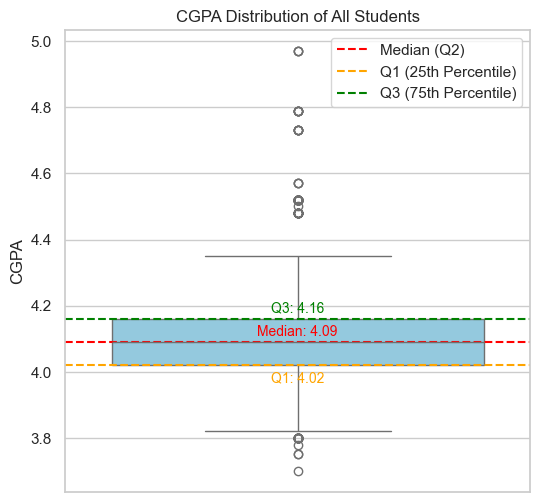

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load CGPA values
cgpa_values = []
for tutorial_group in all_students.values():
  for student in tutorial_group:
    cgpa_values.append(student['CGPA'])

# Sort the CGPA values to calculate median, Q1, and Q3
cgpa_values.sort()

# Function to calculate median or quantiles in a sorted list
def calculate_quantile(data, quantile):
    pos = (len(data) - 1) * quantile
    lower = int(pos)
    upper = lower + 1
    weight = pos - lower
    return data[lower] * (1 - weight) + data[upper] * weight if upper < len(data) else data[lower]

# Calculate Q1, median, and Q3
q1 = calculate_quantile(cgpa_values, 0.25)
median = calculate_quantile(cgpa_values, 0.5)
q3 = calculate_quantile(cgpa_values, 0.75)

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

# Plot a single box plot for CGPA
sns.boxplot(y=cgpa_values, color="skyblue")

# Add lines for median, Q1, and Q3
plt.axhline(median, color='red', linestyle='--', label='Median (Q2)')
plt.axhline(q1, color='orange', linestyle='--', label='Q1 (25th Percentile)')
plt.axhline(q3, color='green', linestyle='--', label='Q3 (75th Percentile)')

# text annotations for median, Q1, and Q3
plt.text(0, median + 0.02, f'Median: {median:.2f}', color='red', fontsize=10, ha='center')
plt.text(0, q1 - 0.05, f'Q1: {q1:.2f}', color='orange', fontsize=10, ha='center')
plt.text(0, q3 + 0.02, f'Q3: {q3:.2f}', color='green', fontsize=10, ha='center')

# titles and labels
plt.title("CGPA Distribution of All Students")
plt.ylabel("CGPA")
plt.legend()

plt.show()

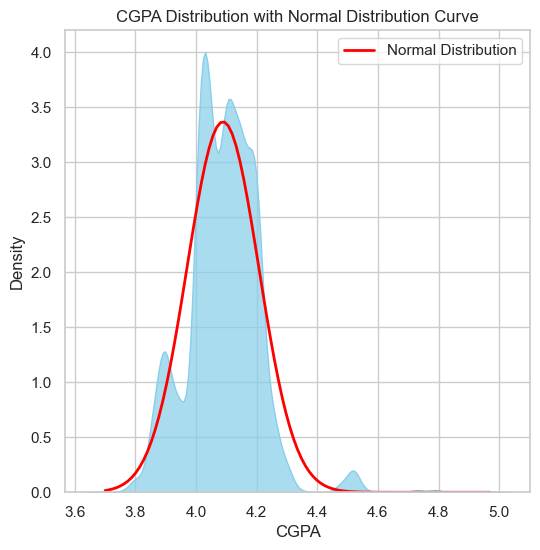

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# load and ensure CPGA values are numeric
cgpa_values = []
for tutorial_group in all_students.values():
    for student in tutorial_group:
        try:
            cgpa_values.append(float(student['CGPA']))  # Convert CGPA to float
        except ValueError:
            print(f"Invalid CGPA value for student {student['ID']}, skipping.")

# check if the list is empty
if not cgpa_values:
    raise ValueError("No valid CGPA values found.")

# calculate mean and standard deviation
mean = sum(cgpa_values) / len(cgpa_values)

variance = sum((x - mean) ** 2 for x in cgpa_values) / len(cgpa_values)
std_dev = math.sqrt(variance)

# set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

# plot a KDE of CGPA
sns.kdeplot(cgpa_values, fill=True, color="skyblue", alpha=0.7)

# generate points for the normal distribution curve
x = [min(cgpa_values) + (i * (max(cgpa_values) - min(cgpa_values)) / 100) for i in range(101)]
# calculate normal distribution
y = [(1 / (std_dev * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((xi - mean) / std_dev) ** 2) for xi in x]

# plot the normal distribution curve
plt.plot(x, y, color='red', linewidth=2, label='Normal Distribution')

# titles and labels
plt.title("CGPA Distribution with Normal Distribution Curve")
plt.xlabel("CGPA")
plt.ylabel("Density")

plt.legend()
plt.show()

Male female ratio differences

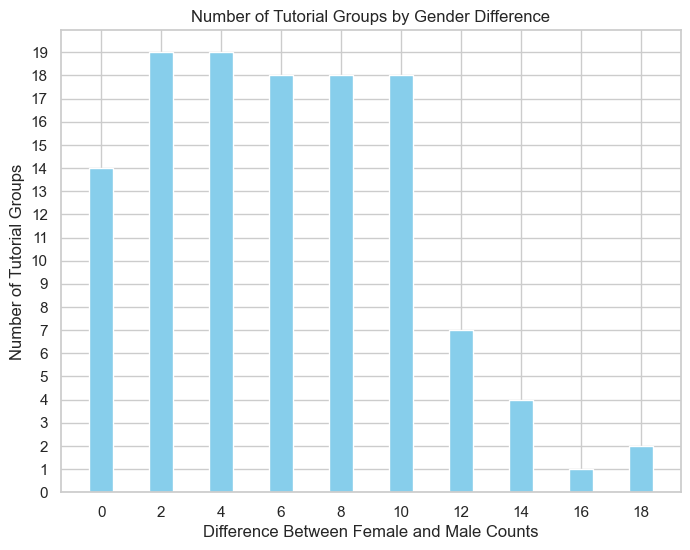

In [7]:
# Calculate gender counts per tutorial group
gender_counts = {}

for tutorial_group, students in all_students.items():
    gender_counts[tutorial_group] = {}
    for student in students:
        gender = student['Gender']
        gender_counts[tutorial_group][gender] = gender_counts[tutorial_group].get(gender, 0) + 1

# Calculate the difference in counts between genders for each tutorial group
difference_counts = {}

for counts in gender_counts.values():
    difference = abs(counts['Female'] - counts['Male'])
    difference_counts[difference] = difference_counts.get(difference, 0) + 1

# Prepare data for plotting
differences = list(difference_counts.keys())
tutorial_group_counts = list(difference_counts.values())

# Sort the data based on the difference values for cleaner visualization
sorted_data = sorted(zip(differences, tutorial_group_counts))
differences, tutorial_group_counts = zip(*sorted_data)

# Plot the number of tutorial groups by gender difference
plt.figure(figsize=(8, 6))
plt.bar(differences, tutorial_group_counts, color='skyblue')
plt.xlabel("Difference Between Female and Male Counts")
plt.ylabel("Number of Tutorial Groups")
plt.title("Number of Tutorial Groups by Gender Difference")
plt.xticks(differences)  # Ensure each difference has a tick mark

max_count = max(tutorial_group_counts)
plt.yticks(range(0, max_count + 1, 1))

plt.show()

Average students in each school

Average: {1: 8.691666666666666, 2: 6.875, 3: 5.708333333333333, 4: 4.816666666666666, 5: 4.125, 6: 3.575, 7: 3.1416666666666666, 8: 2.725, 9: 2.3833333333333333, 10: 2.033333333333333, 11: 1.6916666666666667, 12: 1.425, 13: 1.1166666666666667, 14: 0.8416666666666667, 15: 0.575, 16: 0.225, 17: 0.05}


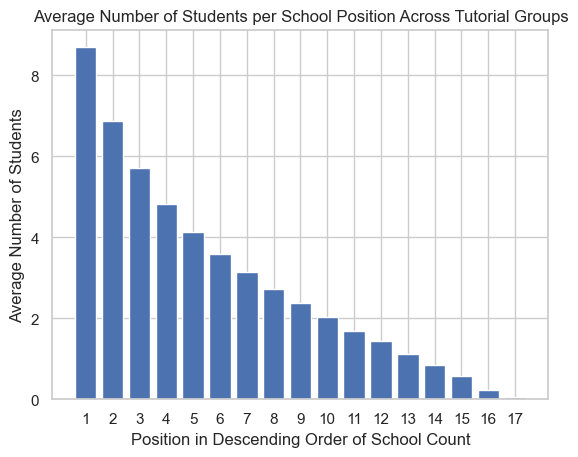

In [8]:
# Dictionary of tutorial groups and schools
all_schools = {}
for tutorial_group, students in all_students.items():
  schools = {}

  # Iterate every students
  for student in students:
    school = student['School']
    schools[school] = schools.get(school, 0) + 1
  # Add the dictionary of schools to the main dictionary
  all_schools[tutorial_group] = list(sorted(schools.values(), reverse=True))

# Calculate the number of students in each position
position = {} # {1: 10, 2: 4...}
for school_list in all_schools.values():
  for i in range(len(school_list)):
    position[i + 1] = position.get(i + 1, 0) + school_list[i]

# Divide by the total number of tutorial groups, which is 120
for position_index, count in position.items():
  position[position_index] = count / 120

print("Average:", position)

# Graph position with x and y values is its key:value pairs
# Plot the result
x_values = list(position.keys())
y_values = list(position.values())

plt.bar(x_values, y_values)
plt.xlabel("Position in Descending Order of School Count")
plt.ylabel("Average Number of Students")
plt.title("Average Number of Students per School Position Across Tutorial Groups")

plt.xticks(ticks=x_values, labels=[int(x) for x in x_values])

plt.show()

# Pattern Recognition
### 1. Distribution of Schools
- Count how many students from each school are present in the dataset and within each TG
- Identify clusters; are there certain TG dominated by students from one school?
### 2. Gender Distribution
- Take a count of the ratio between males and females to see the gender ratio.
### 3. cGPA Distribution
- Identify all outliers (the average cGPA is 4, so we need to look out for the 4.6s+ and the <3s)
### 4. Constraints Patterns
- Recognising recurring issues such as limited diversity

# Pseudocode

ASSIGN THE TWO STUDENTS AT THE SAME TIME 
Create a function assignment_double(students_list, small_groups, majority = 3): 
Initialise groups to be the number of small groups 
	Create a dictionary assigned_groups with keys as group indices and values as False(indicating not assigned)
	Initialise schools as an empty list: 
	For small_groups in small_groups : 
		Count the students in each school and append it to the school list 
	For i in the range  (0, group): 
Initialise student_1 and student_2 with values of students_list[0] and student_list[-1] respectively 
Initialise first and last to have the values of first_group(assigned_groups) and last_group(assigned_groups) respectively 
	Set assigned_done to False 
	For j in range(groups): 
		If the assigned_groups[j] is True : 
			Continue 
		Else : 
			if student_1's school exists in schools[j]: 
Assign the schools_student_1 value to the count of student_1's school in schools[j] + 1 
else: 
Assign schools_student_1 to 1 
if student_2's school exists in schools[j]: 
Assign schools_student_2 value to the count of student_2's school in schools[j] + 1 
else: 
Assign schools_student_2 the value of 1
	If the schools_student_1 < majority and schools_student_2 < majority : 
		Append student_1 to small_group[j]
		Append student_2 to small_group[j]
		From students_list remove student_1 
		From students_list remove student_2 
		Assign the value of True to assigned_groups[j]
		Assign the value of True to assigned_done 
		Break 
	Else : 
		Continue 
If not assigned_done : 
	find student_1 and student_2 using nearest_pair, avoiding student_1's school
	For j in range(groups): 
		If assinged_groups[j] == True : 
			Continue 
		Else : 
			if student_1's school exists in schools[j]: 
Assign the schools_student_1 value to the count of student_1's school in schools[j] + 1 
else: 
Assign schools_student_1 to 1 
if student_2's school exists in schools[j]: 
Assign schools_student_2 value to the count of student_2's school in schools[j] + 1 
			If schools_student_1 < majority and schools_student_2 < majority : 
				Append student_1 to small_groups[j]
				Append student_2 to small_groups[j]
				Remove student_1 from students_list 
				Remove student_1  from students_list 
				Assign True to assigned_groups[j]
				Break 
			Elif j == last : 
				Append student_1 to small_groups[first]
				Append student_2 to small_groups[first]
Assign True to assigned_groups[first]
				Remove student_1 from students_list 
				Remove student_1  from students_list 
				Break 
			Else: 
				Continue 
Return small_groups 

Assign one student at the same time (as the last step) 
Create a function called assignment_single with student_list, small groups and majority as the three parameters of the function 
Initialise variable groups and assign to it the length of small_groups as the value 
Initialise assigned_groups as an empty dictionary 
For i in range(0,groups):
Assign assigned_groups[i] with False
Create an empty list called schools 
For small_groups in small_groups : 
Append the small_groups in list_schools to the list schools
For in range(groups): 
	Initialise student with the value of students_list[0]
	Initialise first and last where they are assigned with the value first_group(assigned_group) and last_group(assigned_groups) respectively 
	For j in range(groups): 
		If the assigned_groups[j] == True : 
			Continue 
		Else: 
			Set threshold to the count of student["School"] in schools[j], or 0 if not found, then add 1 
if threshold is less than majority: 
To small_groups[j] append the student 
Assign assigned_groups[j] with True as the value 
Remove student from student_list 
Break 
Elif j == last : 
	Append student to the list small_groups[first]
	Set assigned_groups[first] to zero 
	Remove student from students_list 
	Break 
				Else : 
	Continue 
Return small_groups 

AUTOMATING ASSIGNMENTS
Create a function full_assignment with student_list, small_groups, rounds, majority  and students_input as the parameters 
Initialise groups with length of the small groups as the value 
If rounds > 0 : 
	If rounds > 1 : 
		Assign small_groups to the result of calling assignment_double with student_list, small_groups and majority 
		Assign student_llist to the result of calling modify_students with students_list 
		Reverse the order of elements in small groups 
		Decrease rounds by 1 
	Else :
		If the remainder of students_input % 2 is equal to 1 : 
			Assign small_groups to the result of calling assignment_double with student_list, small_groups and majority 
			Assign student_list to the result of calling modify_students with studetns_list 
			Reverse the order of elements in small_groups 
			Decrease the value of rounds by 1 
	If the length of students_list is greater than zero : 
		For i in range(0,groups):
Assign assigned_groups[i] with False
Create a empty list called schools 
For small_groups in small_groups : 
	Append list_schools(small_group) to schools list 
For students in stduents_list : 
	Initialise first and last where they are assigned with the value first_group(assigned_group) and last_group(assigned_groups) respectively 
	For j in range(groups): 
		If assinged_groups[j] is True : 
			Continue 
		Else: 
			Set threshold to the count of student["School"] in schools[j], or 0 if not found, then add 1
If threshold is less than majority : 
Append student to small_groups[j]
Set assigned_groups[j] to True 
Break 
Elif j == last : 
Append student to small_groups[first]
Set assigned_groups[first] to True 
Break 
Else : 
Continue 
Return small_groups 
ASSIGN STUDENTS INTO SMALL GROUPS  
Create a empty dictionary all_students_sorted 
Call load_data functions with the file path ‘/content/records_ori.csv’ and store the result in all_students 
For the tutoeial_group, students_list in (dict)all_students.items(): 
	Initialise males_count with the value of gender_count(student_list)[0]
	Initialise students_list with value of sort_gender_cgpa(students_list)
	Initialise small_groups as an empty list 
	For i in range(0,9): 
		Add an empty list to snall_groups 
		set small_groups to the result of calling full_assignment with students_list, small_groups, and majority = 6
for each index and small_group in small_groups:
    for each student in small_group:
        set the "Team Assigned" field of student to (index + 1)
set the element of all_students_sorted at tutorial_group to small_groups


In [9]:
from IPython.display import Image
Image1 = Image(filename='assets/2.png') 
Image2 = Image(filename='assets/3.png')
Image3 = Image(filename='assets/4.png')

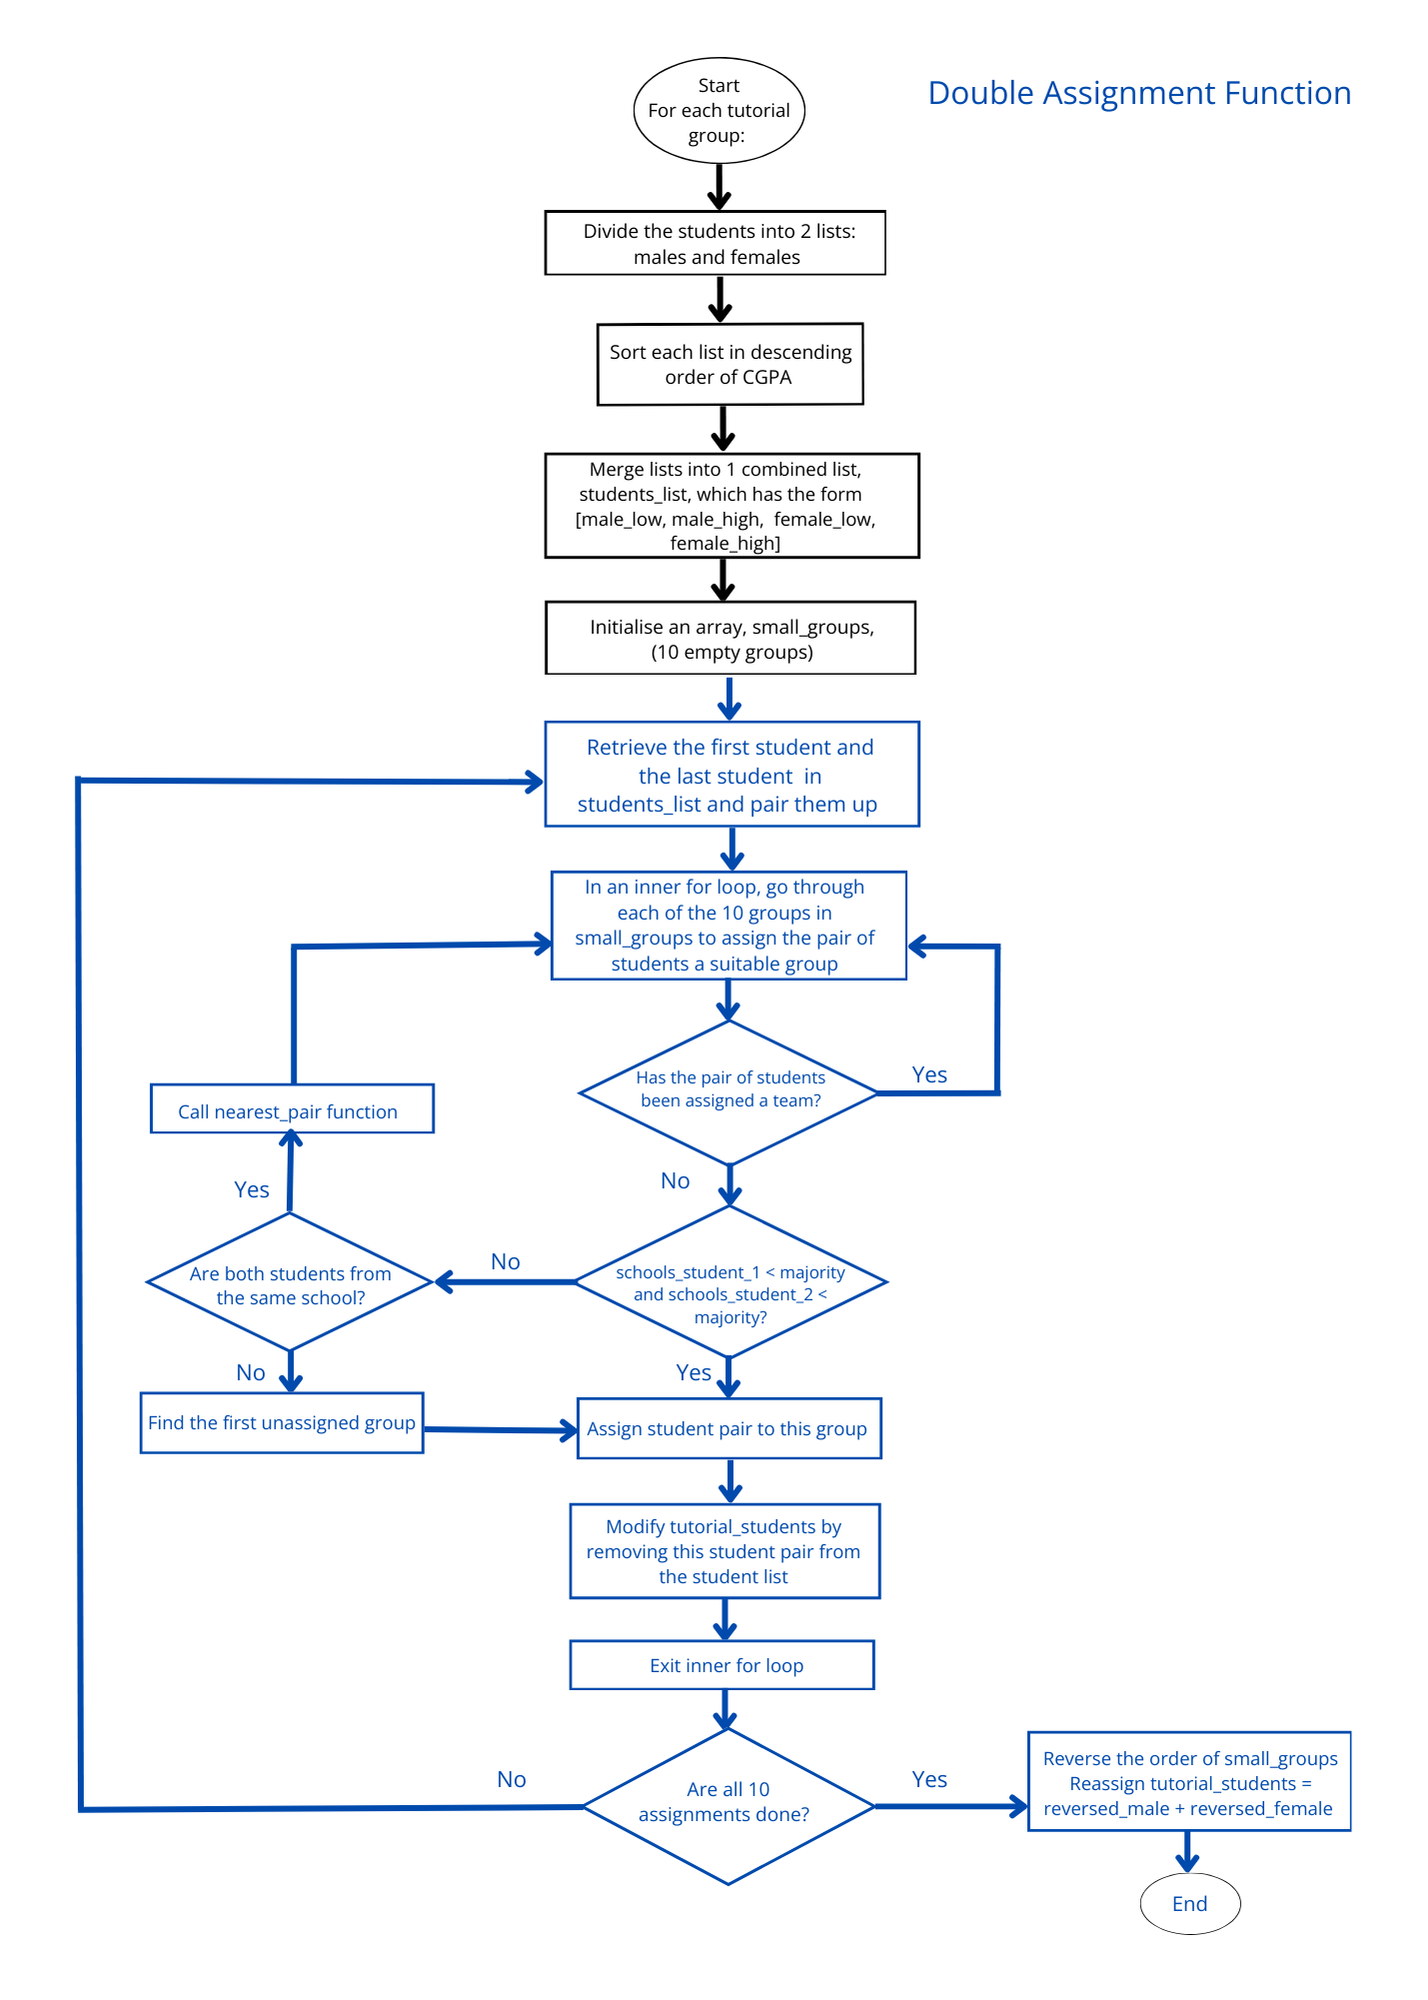

In [10]:
Image1

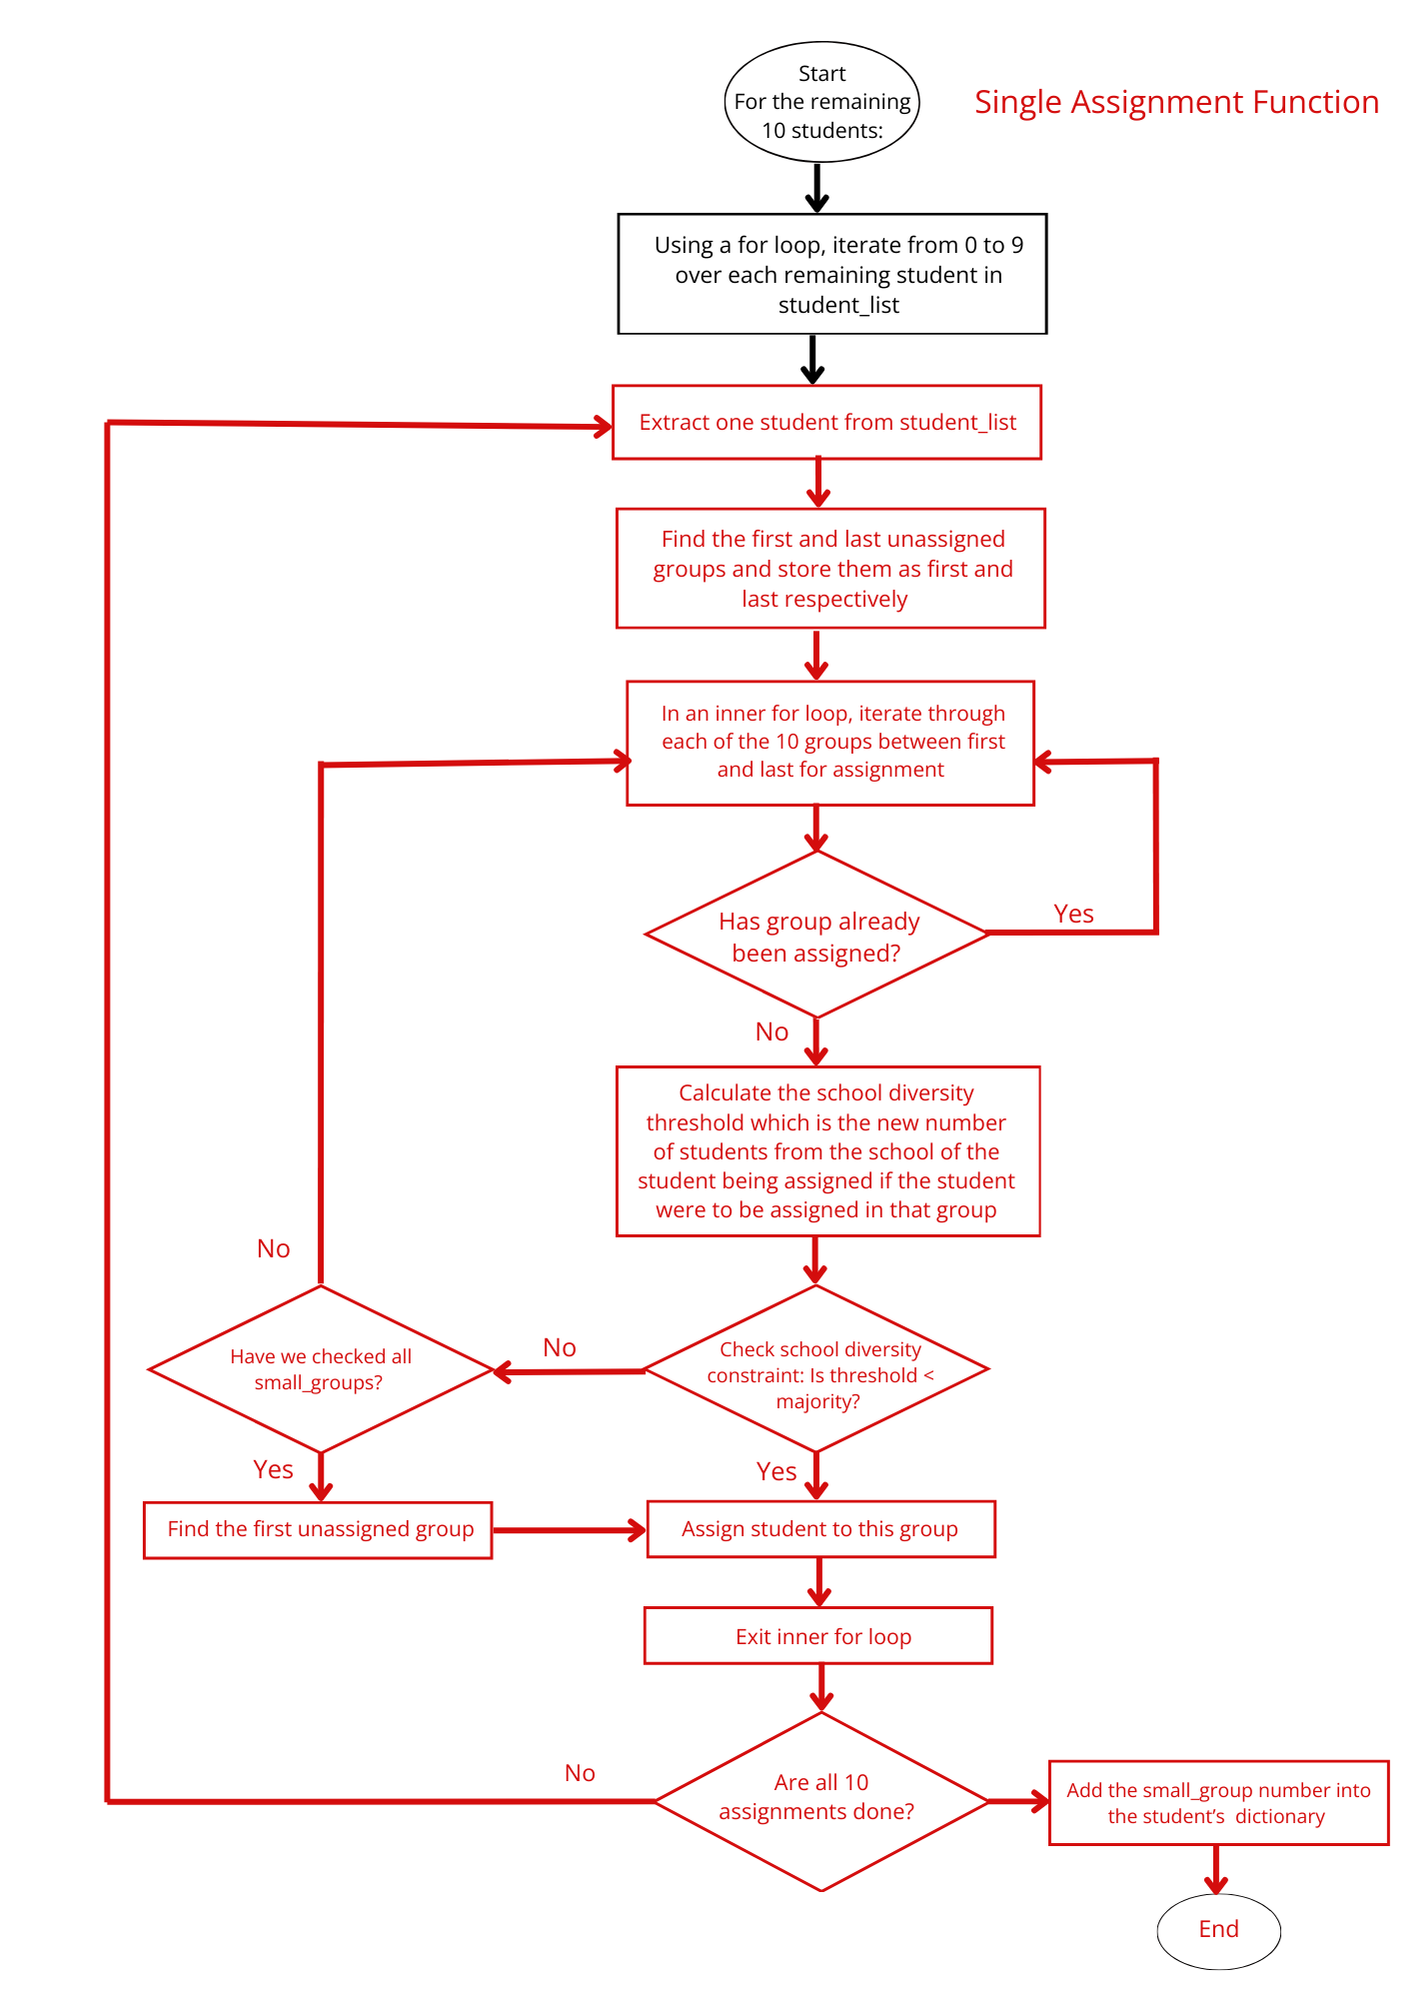

In [11]:
Image2

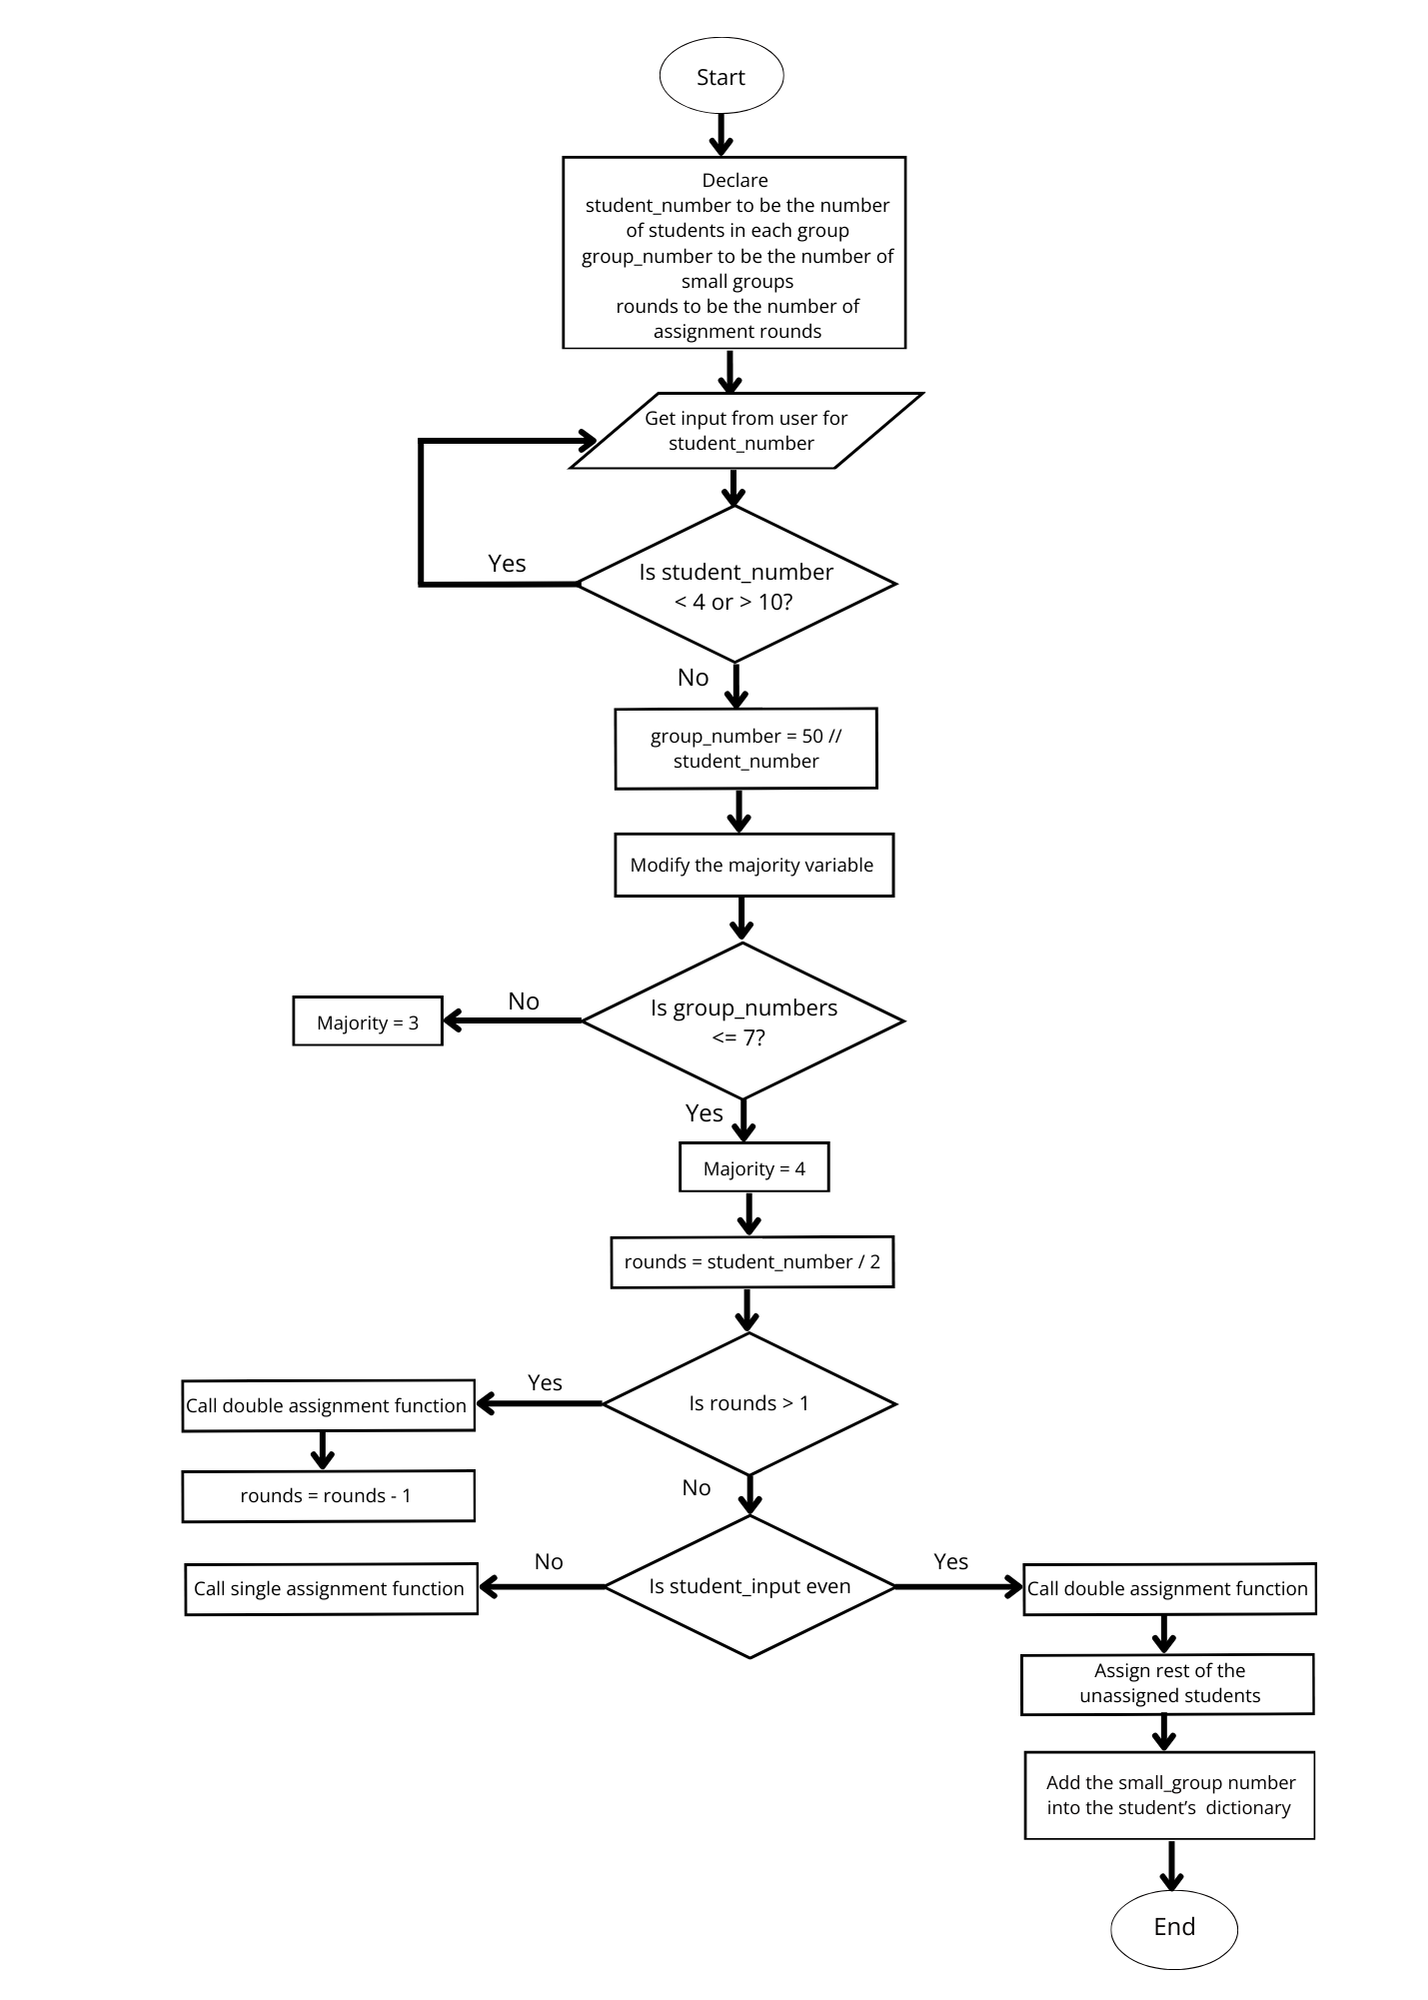

In [12]:
Image3

# Helper Functions

## Sorting Functions


### Sorts students by CGPA and gender, male first

#### Determine the number of males in a tutorial group


In [13]:
def gender_count(students_list: list[dict]) -> tuple[int, int]:
  male_count = 0
  female_count = 0
  for student in students_list:
    if student['Gender'] == 'Male':
      male_count += 1
    else:
      female_count += 1
  return male_count, female_count

#### Sorts by CGPA

Sorts in ascending order. Takes a list of dictionaries as inputs. Uses merge sort.

In [14]:
def sort_students(students_list: list[dict]) -> list[dict]:
    if len(students_list) <= 1:
        return students_list
    else:
        mid = len(students_list) // 2
        left = sort_students(students_list[:mid])
        right = sort_students(students_list[mid:])
        sorted_list = []
        left_index = 0
        right_index = 0

        while left_index < len(left) and right_index < len(right):
            if left[left_index]['CGPA'] < right[right_index]['CGPA']:
                sorted_list.append(left[left_index])
                left_index += 1
            else:
                sorted_list.append(right[right_index])
                right_index += 1

        sorted_list.extend(left[left_index:])
        sorted_list.extend(right[right_index:])

        return sorted_list

#### Combine all of the functions

In [15]:
def sort_gender_cgpa(students_list: list[dict]) -> list[dict]:
  male_students = [student for student in students_list if student["Gender"] == "Male"]
  female_students = [student for student in students_list if student["Gender"] == "Female"]
  male_students = sort_students(male_students)
  female_students = sort_students(female_students)
  return male_students + female_students

  female_students = sort_students(female_students)
  return male_students + female_students

### Modify the list of sorted students after each iteration

`groups` is the number of small groups. `last_male` is the index of the last male in `students_list`.

We remove the first and last `groups` students in `students_list`, then reverse the list gender-CGPA wise.

Returns the modified list and the index of the last male. If there is no males left, returns a negative integer instead.

In [16]:
def modify_students(students_list: list[dict]) -> list[dict]:
  # The assigned students have already been removed, we just find last_male
  last_male = gender_count(students_list)[0]
  if last_male >= len(students_list) or last_male <= 0: # students_list only have 1 gender
    return students_list[::-1]
  else:
    male_students = students_list[:last_male]
    female_students = students_list[last_male:]
    return male_students[::-1] + female_students[::-1]

## Evaluating Assignments

### CGPA

#### Mean

Calculates the mean of a list of numbers.

In [17]:
def list_mean(numbers: list[float]) -> float:
  if len(numbers) <= 0: return 0
  sum = 0
  for num in numbers:
    sum += num
  return sum / len(numbers)

#### Standard Deviation

In [18]:
import math
def list_std(numbers: list[float]) -> float:
  if len(numbers) <= 0: return 0
  mean = list_mean(numbers)
  sum = 0
  for num in numbers:
      sum += (num - mean) ** 2
  return math.sqrt(sum / len(numbers))

#### Normalized Standard Deviation

The idea here is that standard deviation will return different values for different means, even if the distribution is the same. Therefore, we divide the standard distribution by the mean, making the mean an invariant.

In [19]:
def normalized_list_std(numbers: list[float]) -> float:
  if len(numbers) <= 0: return 0
  mean = list_mean(numbers)
  std = list_std(numbers)
  return std / mean

### Gender

### Schools

## Miscellaneous Functions

### School Function

Lists the number of students of on each schools in a list of students. If a school does not have any students in the list, it would not be in the dictionary.

In [20]:
def list_schools(students_list: list[dict]) -> dict:
  schools = {}
  for students in students_list:
    schools[students["School"]] = schools.get(students["School"], 0) + 1
  return schools

## Assignment Function

Does one round of assignment. This is needed because using `is_valid_school` requires recursion. We assume that we use this function for the basic case.

### Finding the first and last un-assigned group

Finds the first and last un-assigned small group. If all the groups have been assigned, returns `-1`.

In [21]:
def first_group(assigned_groups: dict) -> int:
  for i in range(len(assigned_groups)):
    if assigned_groups[i] == False:
      return i
  return -1

In [22]:
def last_group(assigned_groups: dict) -> int:
  for i in range(len(assigned_groups) - 1, -1, -1):
    if assigned_groups[i] == False:
      return i
  return -1

### Finding the nearest unassigned pair from different schools

Returns the nearest (most similar by cgpa) pair of students from different schools. If there's none, return the first and last element of `students_list`

In [23]:
def nearest_pair(students_list: list[dict], avoided_school: str) -> tuple[dict, dict]:
    right_counter = 0
    left_counter = 1
    n = len(students_list)

    while right_counter + left_counter < n:
        # Check if the student on the right side is not from avoided school
        if students_list[right_counter]["School"] != avoided_school:
            break
        right_counter += 1

        # Check if the student on the left side is not from avoided school
        if students_list[-left_counter]["School"] != avoided_school:
            break
        left_counter += 1

    return students_list[right_counter], students_list[-left_counter]


### Assigns two students at the same time

In [24]:
def assignment_double(students_list: list[dict], small_groups: list[list[dict]], majority: int = 3) -> list[dict]:
  groups = len(small_groups)
  # only consider small groups that havent been assigned
  # check for the earliest small group such that is_valid_school is True
  # if no such group exist, put it in the earliest group
  assigned_groups = {i : False for i in range(groups)}

  # since we will check the schools multiple times, it's better to make a dictionary first to save time
  schools = [] # schools[i] returns the number of students in each school in small_group[i]
  for small_group in small_groups:
    schools.append(list_schools(small_group))

  # begin assignment
  for i in range(groups):
    student_1, student_2 = students_list[0], students_list[-1]
    first, last = first_group(assigned_groups), last_group(assigned_groups)
    # Note whether an assignment has been done or not
    assigned_done = False
    for j in range(groups):
      if assigned_groups[j] == True:
        continue
      else:
        schools_student_1 = schools[j].get(student_1["School"], 0) + 1
        schools_student_2 = schools[j].get(student_2["School"], 0) + 1
        if schools_student_1 < majority and schools_student_2 < majority:
          small_groups[j].append(student_1)
          small_groups[j].append(student_2)
          students_list.remove(student_1)
          students_list.remove(student_2)
          assigned_groups[j] = True
          assigned_done = True
          break
        else:
          continue
    if not assigned_done: # this means student_1 and student_2 came from the same school
        student_1, student_2 = nearest_pair(students_list, student_1["School"])

        # Do the assignment
        for j in range(groups):
          if assigned_groups[j] == True:
            continue
          else:
            schools_student_1 = schools[j].get(student_1["School"], 0) + 1
            schools_student_2 = schools[j].get(student_2["School"], 0) + 1

            if schools_student_1 < majority and schools_student_2 < majority:
              small_groups[j].append(student_1)
              small_groups[j].append(student_2)
              students_list.remove(student_1)
              students_list.remove(student_2)
              assigned_groups[j] = True
              break

            elif j == last:
              small_groups[first].append(student_1)
              small_groups[first].append(student_2)
              assigned_groups[first] = True
              students_list.remove(student_1)
              students_list.remove(student_2)
              break

            else:
                continue

  return small_groups




### Assigns one student at the same time (last step)

In [25]:
# Here, gender doesn't matter anymore since it's either all small groups
# have exactly 2 males and 2 females or the genders in students_list are all the same
# CGPA kinda doesn't matter, but if its too skewed we might need to classify CGPA's
def assignment_single(students_list: list[dict], small_groups: list[list[dict]], majority: int = 3) -> list[dict]:
  groups = len(small_groups)
  assigned_groups = {i : False for i in range(groups)}
  schools = []
  for small_group in small_groups:
    schools.append(list_schools(small_group))
      
  for i in range(groups):
    student = students_list[0]

    # find the first and last un-assigned group
    first, last = first_group(assigned_groups), last_group(assigned_groups)
    for j in range(groups):
      if assigned_groups[j] == True:
        continue
      else:
        threshold = schools[j].get(student["School"], 0) + 1
        if threshold < majority:
          small_groups[j].append(student)
          assigned_groups[j] = True
          students_list.remove(student)
          break
        elif j == last:
          small_groups[first].append(student)
          assigned_groups[first] = True
          students_list.remove(student)
          break
        else:
          continue

  return small_groups


### Automating assignments

In [26]:
def full_assignment(students_list: list[dict], small_groups: list[list[dict]], rounds: int = 3, majority: int = 3, students_input: int = 5) -> list[list[dict]]:
  groups = len(small_groups)
  while rounds > 0:
    if rounds > 1:
      small_groups = assignment_double(students_list, small_groups, majority=majority)
      students_list = modify_students(students_list)
      small_groups = small_groups[::-1]
      rounds -= 1

    else:
      if students_input % 2 == 1:
        small_groups = assignment_single(students_list, small_groups, majority=majority)
        # Modify students_list for the last assignments
        students_list = students_list[::-1]

        rounds -= 1
      else:
        small_groups = assignment_double(students_list, small_groups, majority=majority)
        students_list= modify_students(students_list)
        small_groups = small_groups[::-1]
        rounds -= 1

  if len(students_list) > 0: # If there are still unassigned students
    # Use an algorithm similar to assignment_single
    assigned_groups = {i: False for i in range(groups)}
    schools = []
    for small_group in small_groups:
      schools.append(list_schools(small_group))

    for student in students_list:
      first, last = first_group(assigned_groups), last_group(assigned_groups)
      for j in range(groups):
        if assigned_groups[j] == True:
          continue
        else:
          threshold = schools[j].get(student["School"], 0) + 1
          if threshold < majority:
            small_groups[j].append(student)
            assigned_groups[j] = True
            break
          elif j == last:
            small_groups[first].append(student)
            assigned_groups[first] = True
            break
          else:
            continue

  return small_groups

# Main Function (Basic)

By this time, the data has been cleaned. We use a for loop for each tutorial group.

Assume the name of the big dictionary containing 6000 students is called `all_students`. `all students` have 120 elements, each of which is a list of 50 elements corresponding to each tutorial group. Change the variable names if necessary.

## Assign the students into small groups

In [27]:
# Initialize the sorted version of all_students
all_students_sorted = {}
all_students = load_data('records data sc1003.csv')

# This loop runs 120 times
for tutorial_group, students_list in all_students.items():
  # Determine the number of males
  males_count = gender_count(students_list)[0]

  # Sort students by CGPA and gender
  students_list = sort_gender_cgpa(students_list)

  # Initialize the small groups
  small_groups = [[] for _ in range(10)]

  # Run the assignment
  small_groups =  full_assignment(students_list, small_groups, majority = 6)

  # Add "Team Assigned" to each student
  for index, small_group in enumerate(small_groups):
    for student in small_group:
      student["Team Assigned"] = index + 1
  # Append small_group to all_students_sorted
  all_students_sorted[tutorial_group] = small_groups

sorted

In [28]:
print(all_students_sorted['G-1'][0]);

[{'Tutorial Group': 'G-1', 'Student ID': '1329', 'School': 'NIE', 'Name': 'Nguyen Van Sam', 'Gender': 'Male', 'CGPA': 3.85, 'Team Assigned': 1}, {'Tutorial Group': 'G-1', 'Student ID': '3861', 'School': 'ASE', 'Name': 'Layla Torres', 'Gender': 'Female', 'CGPA': 4.52, 'Team Assigned': 1}, {'Tutorial Group': 'G-1', 'Student ID': '1075', 'School': 'CoB (NBS)', 'Name': 'Felix Yip', 'Gender': 'Male', 'CGPA': 4.08, 'Team Assigned': 1}, {'Tutorial Group': 'G-1', 'Student ID': '5119', 'School': 'ADM', 'Name': 'Nhung Vu', 'Gender': 'Female', 'CGPA': 4.04, 'Team Assigned': 1}, {'Tutorial Group': 'G-1', 'Student ID': '588', 'School': 'MAE', 'Name': 'Lucas Walker', 'Gender': 'Male', 'CGPA': 4.06, 'Team Assigned': 1}]


## Evaluating the assignments

### CGPA

For each tutorial group, we would like to measure: <br>
* The normalized std of the mean of each small groups (reflects the diversity of average cGPA among the small groups, i.e. size variety)
* The normalized std of the normalized std of each small groups (reflects the diversity of how the cGPAs are distributed in each small group, i.e. shape variety) <br>

We used the normalized std instead of std because each tutorial group's mean cGPA is different. For all measures, lower is better

In [29]:
print(all_students_sorted['G-1'][0][0])

{'Tutorial Group': 'G-1', 'Student ID': '1329', 'School': 'NIE', 'Name': 'Nguyen Van Sam', 'Gender': 'Male', 'CGPA': 3.85, 'Team Assigned': 1}


Make a dictionary with `key:value` pair `tutorial_group:[size_variety, shape_variety]`



Calculate the measures for each tutorial group

In [30]:
def evaluate_cgpa_func(all_students_sorted: dict[str, list[list[dict[str, Union[str, float]]]]]) -> dict[str, list[float]]:
  evaluate_cgpa = {}
  # tutorial_group is a list of 10 elements, each of which is a list that
  # contains 5 students
  for tutorial_id, tutorial_group in all_students_sorted.items():
    # list_size contains the means of each small group
    list_size = []
    # list_shape contains the normalized std of each small group
    list_shape = []

    # small_group is a list that contains 5 students
    # this for loop runs 10 times
    for small_group in tutorial_group:
      # cgpa_list is the list of cgpa of all members in a small group
      cgpa_list = []
      for student in small_group:
        cgpa_list.append(student["CGPA"])
      list_size.append(list_mean(cgpa_list))

      normalized_std = normalized_list_std(cgpa_list)
      list_shape.append(normalized_std)

    size_variety = normalized_list_std(list_size)
    shape_variety = normalized_list_std(list_shape)

    evaluate_cgpa[tutorial_id] = [size_variety, shape_variety]

  return evaluate_cgpa

compare the values if the groups had been assigned randomly. plot them too

In [31]:
evaluate_cgpa = evaluate_cgpa_func(all_students_sorted)
print(evaluate_cgpa);

{'G-1': [0.0022883825595975886, 0.47180070102111665], 'G-10': [0.002798418706340573, 0.4782132754753991], 'G-100': [0.0049357430608527745, 0.37570955572635495], 'G-101': [0.005078249195873528, 0.3734894977977018], 'G-102': [0.0014212772337284685, 0.2204219836160276], 'G-103': [0.002922066923411912, 0.35683450362675906], 'G-104': [0.0017181890357138175, 0.21962909221653007], 'G-105': [0.0031404767756057195, 0.2779701314416133], 'G-106': [0.005610981268068563, 0.3302639065255733], 'G-107': [0.0017451562782004936, 0.0893423762340011], 'G-108': [0.007272346180629884, 0.4306161159377391], 'G-109': [0.002042767249227608, 0.13738125104758425], 'G-11': [0.0033702742427774083, 0.18084463734923906], 'G-110': [0.002508674093102688, 0.2558518089829023], 'G-111': [0.0030639471946866965, 0.30677207702799475], 'G-112': [0.002872058256621919, 0.399835219230757], 'G-113': [0.003983547950308152, 0.238802591466141], 'G-114': [0.004995888263997327, 0.528167558757924], 'G-115': [0.0021864832749437712, 0.26

### Gender

Returns the number of students whose gender needs to be changed in order to get a gender-wise balanced team


In [32]:
def gender_difference(small_groups: list[list[dict]]) -> dict[int, float]:
  gender_difference_dict = {}
  for index, small_group in enumerate(small_groups):
    male_count = 0
    female_count = 0
    for student in small_group:
      if student['Gender'] == 'Male':
        male_count += 1
      else:
        female_count += 1
    # Avoid division by zero if there are no females
    diff = abs(male_count - female_count)
    # This is the number of students whose gender needs to be changed to get
    # A gender-wise balanced team
    diff = diff // 2

    gender_difference_dict[diff] = gender_difference_dict.get(diff, 0) + 1
  return gender_difference_dict

Evaluating gender difference

In [33]:
gender_difference_dict = {}

for tutorial_group, small_groups in all_students_sorted.items():
    difference = gender_difference(small_groups)
    print(f"Gender difference for tutorial group {tutorial_group}: {difference}")
    gender_difference_dict[tutorial_group] = difference

Gender difference for tutorial group G-1: {0: 10}
Gender difference for tutorial group G-10: {0: 10}
Gender difference for tutorial group G-100: {0: 10}
Gender difference for tutorial group G-101: {0: 10}
Gender difference for tutorial group G-102: {0: 10}
Gender difference for tutorial group G-103: {0: 10}
Gender difference for tutorial group G-104: {0: 10}
Gender difference for tutorial group G-105: {0: 10}
Gender difference for tutorial group G-106: {0: 10}
Gender difference for tutorial group G-107: {1: 1, 0: 9}
Gender difference for tutorial group G-108: {0: 10}
Gender difference for tutorial group G-109: {0: 10}
Gender difference for tutorial group G-11: {0: 10}
Gender difference for tutorial group G-110: {0: 10}
Gender difference for tutorial group G-111: {0: 10}
Gender difference for tutorial group G-112: {0: 10}
Gender difference for tutorial group G-113: {0: 10}
Gender difference for tutorial group G-114: {1: 3, 0: 7}
Gender difference for tutorial group G-115: {0: 10}
Gender

For a 5-member team, a value of 0 means the distribution is (2,3), 1: (1,4), 2: (0,5)

There are tutorial groups in which there are some small groups with unbalanced genders. Find the tutorial groups and their gender counts and show that it is the most optimized

Check for unbalanced groups

In [34]:
# Extract groups
unbalanced_groups = {}
for tutorial_id, gender_info in gender_difference_dict.items():
  for number, value in gender_info.items():
    if number > 0:
      unbalanced_groups[tutorial_id] = unbalanced_groups.get(tutorial_id, 0) + value * number

print(unbalanced_groups)

{'G-107': 1, 'G-114': 3, 'G-18': 1, 'G-2': 2, 'G-25': 1, 'G-26': 1, 'G-39': 2, 'G-4': 4, 'G-5': 2, 'G-56': 1, 'G-70': 2, 'G-71': 1, 'G-94': 1, 'G-97': 4}


Check if there is a small group that has only one type of gender

In [35]:
mono_gender = []

for tutorial_id in unbalanced_groups.keys():
  for difference in gender_difference_dict[tutorial_id].keys():
    if difference > 1:
      mono_gender.append(tutorial_id)
      break

print(mono_gender)

[]


No small groups have only one type of gender

By the pigeonhole principle, tutorial group with a majority gender of $30 + n$ have at least $n$ unbalanced students. Find this differences.

In [36]:
gender_info = {}
for tutorial_id in unbalanced_groups.keys():
  males_count = 0
  females_count = 0
  for small_group in all_students_sorted[tutorial_id]:
    males, females = gender_count(small_group)
    males_count += males
    females_count += females
  gender_info[tutorial_id] = max(males_count, females_count) - 30

print(gender_info)

{'G-107': 1, 'G-114': 3, 'G-18': 1, 'G-2': 2, 'G-25': 1, 'G-26': 1, 'G-39': 2, 'G-4': 4, 'G-5': 2, 'G-56': 1, 'G-70': 2, 'G-71': 1, 'G-94': 1, 'G-97': 4}


Compare them to the unbalanced created

In [37]:
pigeonhole = {}

for tutorial_id, value in unbalanced_groups.items():
  pigeonhole[tutorial_id] = value - gender_info[tutorial_id]

print(pigeonhole)

{'G-107': 0, 'G-114': 0, 'G-18': 0, 'G-2': 0, 'G-25': 0, 'G-26': 0, 'G-39': 0, 'G-4': 0, 'G-5': 0, 'G-56': 0, 'G-70': 0, 'G-71': 0, 'G-94': 0, 'G-97': 0}


Since all of them equals $0$, we have achieved perfect gender distribution.

### Schools

How many different schools are there in each group? What's the maximum number of students from the same school?

In [38]:
def evaluate_schools(all_students_sorted):
    #Returns a dictionary mapping tutorial group IDs to a list of team numbers where any school has more than three students.
    overrepresented_teams = {}

    for tg_id, small_groups in all_students_sorted.items():
        overrepresented_team_numbers = []
        for team_number, team_members in enumerate(small_groups, start=1):
            # Count the number of students from each school in this team
            school_counts = {}
            for student in team_members:
                school = student['School']
                school_counts[school] = school_counts.get(school, 0) + 1

            # Check if any school has more than three students in the team
            if any(count > 3 for count in school_counts.values()):
                overrepresented_team_numbers.append(team_number)

        if overrepresented_team_numbers:
            overrepresented_teams[tg_id] = overrepresented_team_numbers

    return overrepresented_teams


In [39]:
evaluate_schools(all_students_sorted)

{'G-118': [1], 'G-8': [10], 'G-88': [7]}

## Return back to csv

Change the format of the data to a csv-friendly format

In [40]:
from typing import Union

# Change the format of our students' data
def change_format(all_students_sorted: dict[str, list[list[dict[str, Union[str, float]]]]]) -> list[list[str]]:
    # Format: [[student1], [student2]...]
    changed_form = []

    for small_groups in all_students_sorted.values():
        for small_group in small_groups:
            for student in small_group: # student is a dictionary
                # Protoype for student info
                student_info = []

                for value in student.values():
                    student_info.append(str(value)) # Change CGPA, Team Assigned to string
                changed_form.append(student_info)

    return changed_form


Function to make the output file

In [41]:
def write_data(file_name: str, header: list[str], data: list[list[str]]):
    with open(file_name, 'w') as file:
        # Write header first
        file.write(",".join(header) +"\n")

        # Write the rest of the students
        for student in data:
            file.write(",".join(student) + "\n")

Header file of output csv

In [42]:
header = ['Tutorial Group', 'Student ID', 'School', 'Name', 'Gender', 'CGPA', 'Team Assigned']

Combine and execute the function

In [43]:
def output_to_csv(all_students_sorted: dict[str, list[list[dict[str, Union[str, float]]]]], file_name: str, header: str) -> None:
    changed_students = change_format(all_students_sorted)
    write_data(file_name, header, changed_students)

In [44]:
output_to_csv(all_students_sorted, 'ECDS2_Team5_PooiJerome.csv', header)

# Random Function

In [45]:
import random

def random_team_assignment(all_students: dict[str, list[dict[str, Union[str, float]]]], team_size: int = 5) -> dict[str, list[list[dict[str, Union[str, float]]]]]:
    assigned_students = {}

    for tg_id, students in all_students.items():
        # Shuffle the students randomly
        shuffled_students = students.copy()
        random.shuffle(shuffled_students)

        # Assign teams
        teams = []
        for i in range(0, len(shuffled_students), team_size):
            team = shuffled_students[i:i+team_size]
            teams.append(team)

        # Assign team numbers to students
        for team_number, team in enumerate(teams, start=1):
            for student in team:
                student['Team Assigned'] = team_number

        # Store the teams directly in assigned_students
        assigned_students[tg_id] = teams

    return assigned_students

random_assigned_students = random_team_assignment(all_students, team_size=5)

## Visualisation of the difference between the two distribution of teams

### Mean Visualisation

In [46]:
# Evaluating cGPA for the algorithmic data:
algorithm_data = evaluate_cgpa_func(all_students_sorted)

# Initiating a for loop to calculate the average of 250 random distributions, allowing for a good sample size and comparison.
num_iterations = 250
aggregated_random_size_varieties = []

for _ in range(num_iterations):
  random_data = evaluate_cgpa_func(random_assigned_students)
    # Extract size varieties
  random_size_varieties = [values[0] for values in random_data.values()]
    # Aggregate the results
  aggregated_random_size_varieties.append(random_size_varieties)

In [47]:
# Evaluating cGPA for the algorithmic data:
algorithm_data = evaluate_cgpa_func(all_students_sorted)
algorithm_data_size = [values[0] for values in algorithm_data.values()]
algorithm_data_shape = [values[1] for values in algorithm_data.values()]

# Initiating a for loop to calculate the average of 250 random distributions, allowing for a good sample size and comparison.
num_iterations = 250
aggregated_random_size = []
aggregated_random_shape = []

for _ in range(num_iterations):
  random_assigned_students = random_team_assignment(all_students, team_size=5)
  random_data = evaluate_cgpa_func(random_assigned_students)
    # Extract size varieties
  random_size = [values[0] for values in random_data.values()]
  random_shape = [values[1] for values in random_data.values()]
    # Aggregate the results
  aggregated_random_size.append(random_size)
  aggregated_random_shape.append(random_shape)

In [48]:
# Calculate average of each tutorial group's shape and size
# aggregated_random_size[i][j] means the jth tutorial group in the ith random allocation
# we want to calculate the average that for all i taken from all j
average_size_random = []
average_shape_random = []

sum_size = 0
sum_shape = 0
for i in range(120):
  for j in range(num_iterations):
    sum_size += aggregated_random_size[j][i]
    sum_shape += aggregated_random_shape[j][i]
  average_size_random.append(sum_size / num_iterations)
  average_shape_random.append(sum_shape / num_iterations)
  sum_size = 0
  sum_shape = 0

In [49]:
size_ratio = [average_size_random[i] / algorithm_data_size[i] for i in range(120)]
shape_ratio = [average_shape_random[i] / algorithm_data_shape[i] for i in range(120)]

In [50]:
# Take the average of size_ratio and shape_ratio
size_improvement = 0
shape_improvement = 0

for i in range(120):
  size_improvement += size_ratio[i]
  shape_improvement += shape_ratio[i]

size_improvement /= 120
shape_improvement /= 120

Print the results. If the random function did just as better as our algorithm, then `[size_improvement, shape_improvement] == [1, 1]

In [51]:
print(f"Size Improvement: {size_improvement:.2f} times better")
print(f"Shape Improvement: {shape_improvement:.2f} times better")

Size Improvement: 3.68 times better
Shape Improvement: 1.43 times better


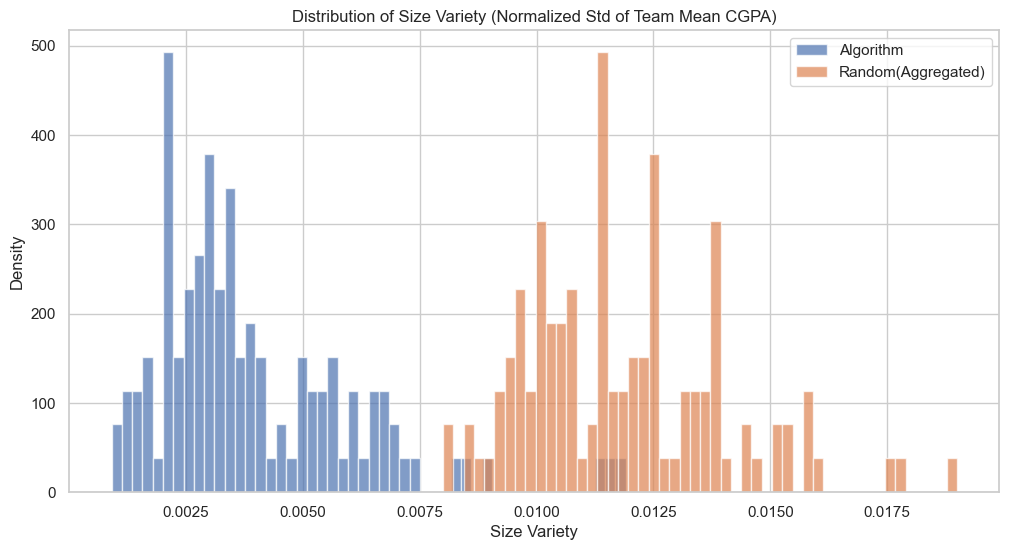

In [52]:
# Plotting the distribution of size variety (normalized std of team mean CGPA)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.hist(algorithm_data_size, bins=50, alpha=0.7, label='Algorithm', density=True)
plt.hist(average_size_random, bins=50, alpha=0.7, label='Random(Aggregated)', density=True)
plt.title('Distribution of Size Variety (Normalized Std of Team Mean CGPA)')
plt.xlabel('Size Variety')
plt.ylabel('Density')
plt.legend()
plt.show()


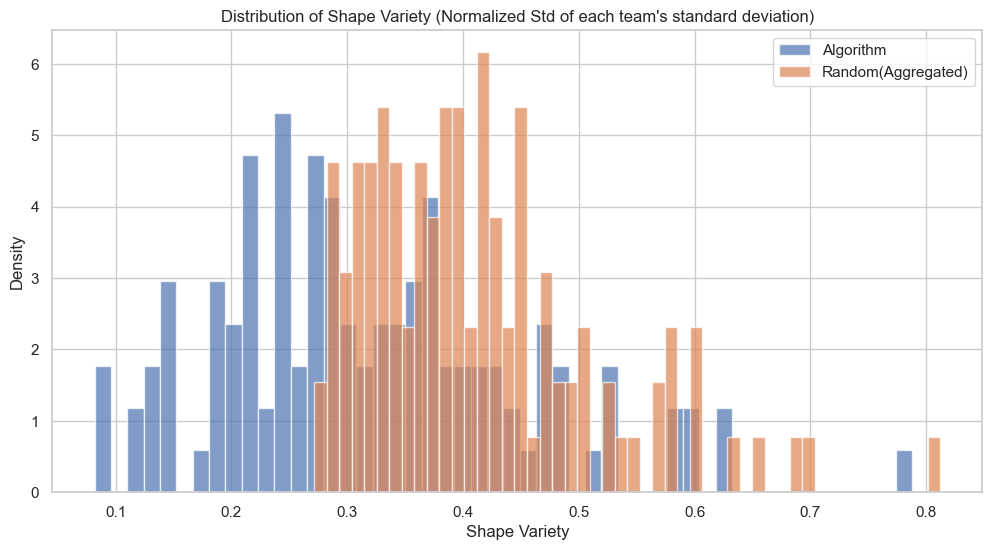

In [53]:
plt.figure(figsize=(12,6))
plt.hist(algorithm_data_shape, bins=50, alpha=0.7, label='Algorithm', density=True)
plt.hist(average_shape_random, bins=50, alpha=0.7, label='Random(Aggregated)', density=True)
plt.title("Distribution of Shape Variety (Normalized Std of each team's standard deviation)")
plt.xlabel('Shape Variety')
plt.ylabel('Density')
plt.legend()
plt.show()

### Gender Distribution

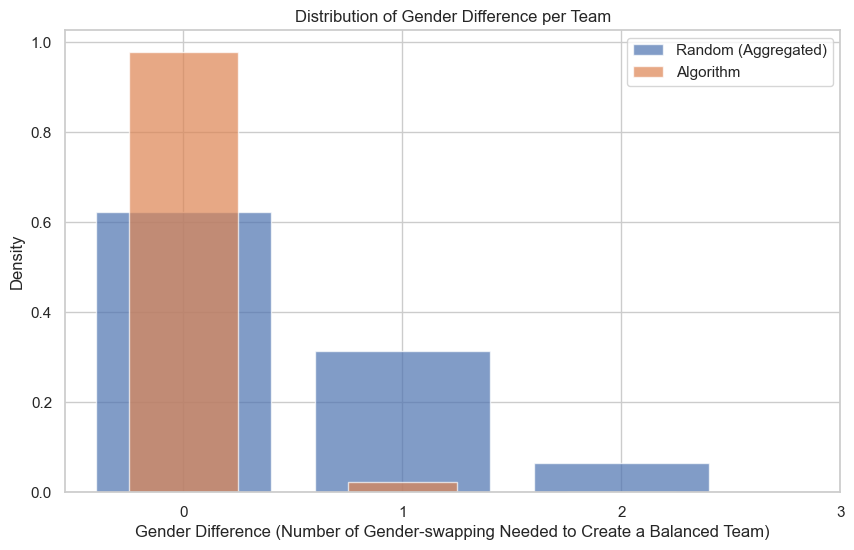

In [54]:
import matplotlib.pyplot as plt

# Gender Difference Function with formatted array
def gender_difference_func(all_students_sorted: dict[str, list[list[dict[str, Union[str, float]]]]]) -> dict[str, dict[int, float]]:
  gender_difference_dict = {}
  for tutorial_group, small_groups in all_students_sorted.items():
    gender_difference_dict[tutorial_group] = gender_difference(small_groups)
  return gender_difference_dict

# Calculate gender difference for our algorithm
algorithm_gender_diff = gender_difference_func(all_students_sorted)

#Calculating Gender difference average for 250 random distributions
aggregated_random_gender_differences = []
for _ in range(num_iterations):
    # Generate a random team assignment
    random_assigned_students = random_team_assignment(all_students, team_size=5)
    # Calculate gender difference per team
    random_gender_diff = gender_difference_func(random_assigned_students)
    # Prepare data for plotting
    random_gender_differences = []
    for gender_diff_dict in random_gender_diff.values():
        for diff_value, count in gender_diff_dict.items():
            random_gender_differences.extend([diff_value] * count)
    # Aggregate the results
    aggregated_random_gender_differences.extend(random_gender_differences)

# Prepare data for plotting
algorithm_gender_differences = []
for gender_diff_dict in algorithm_gender_diff.values():
    for diff_value, count in gender_diff_dict.items():
        algorithm_gender_differences.extend([diff_value] * count)

random_gender_differences = []
for gender_diff_dict in random_gender_diff.values():
    for diff_value, count in gender_diff_dict.items():
        random_gender_differences.extend([diff_value] * count)


# Plot histograms
plt.figure(figsize=(10,6))
bins = range(0, max(algorithm_gender_differences + aggregated_random_gender_differences) + 2)
plt.hist(aggregated_random_gender_differences, bins=bins, alpha=0.7, label='Random (Aggregated)', align='left', rwidth=0.8, density=True)
plt.hist(algorithm_gender_differences, bins=bins, alpha=0.7, label='Algorithm', align='left', rwidth=0.5, density=True)
plt.title('Distribution of Gender Difference per Team')
plt.xlabel('Gender Difference (Number of Gender-swapping Needed to Create a Balanced Team)')
plt.ylabel('Density')
plt.xticks(bins)
plt.legend()
plt.show()


### School Distribution

Text(0, 0.5, 'Number of Teams')

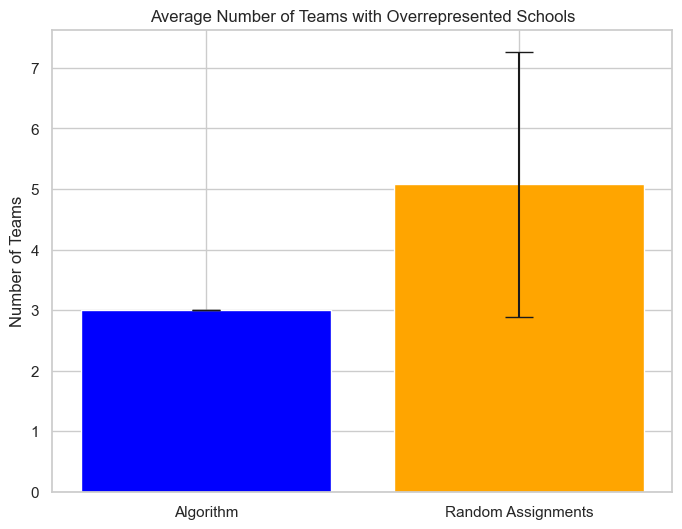

In [55]:
from typing import Union
def evaluate_schools_number(all_students_sorted: dict[str, list[list[dict[str, Union[str, int]]]]], majority: int = 3) -> int:
    # Returns the number of tutorial groups that has a majority school.
    number = 0

    for small_groups in all_students_sorted.values():
        for team_members in small_groups:
            # Count the number of students from each school in this team
            school_counts = {}
            for student in team_members:
                school = student['School']
                school_counts[school] = school_counts.get(school, 0) + 1

            # Check if any school has more than three students in the team
            if any(count > majority for count in school_counts.values()):
                number += 1

    return number

#Get count of schools for each group
overrepresented_algorithm = evaluate_schools_number(all_students_sorted)
overrepresented_random_counts = []
for _ in range(num_iterations):
    # Generate a random team assignment
    random_assigned_students = random_team_assignment(all_students, team_size=5)
    # Evaluate overrepresented schools for the random assignment
    overrepresented_count = evaluate_schools_number(random_assigned_students)
    # Collect the result
    overrepresented_random_counts.append(overrepresented_count)

#Stats for plotting
mean_random_overrepresented = sum(overrepresented_random_counts) / num_iterations
std_random_overrepresented = (sum((x - mean_random_overrepresented) ** 2 for x in overrepresented_random_counts) / num_iterations) ** 0.5

# Prepare data for plotting
assignments = ['Algorithm', 'Random Assignments']
overrepresented_counts = [overrepresented_algorithm, mean_random_overrepresented]
error_bars = [0, std_random_overrepresented]  # No error bar for algorithm since it's a single value

# Plot side-by-side bar chart with error bars
plt.figure(figsize=(8,6))
bars = plt.bar(assignments, overrepresented_counts, yerr=error_bars, capsize=10, color=['blue', 'orange'])
plt.title('Average Number of Teams with Overrepresented Schools')
plt.ylabel('Number of Teams')


# Main Function (Enhanced)

## Getting Input

In [56]:
while True:
  students_number = int(input("Enter the number of students: "))
  if students_number < 4 or students_number > 10:
    print("Invalid number of students. Please enter a number between 4 and 10.")
  else:
    break

Enter the number of students:  6


We take the number of groups to be $\left \lfloor \dfrac{50}{s} \right \rfloor$, where `s = students_number`. This means that if $s$ does not divide 50, there will be a tutorial group with $s+1$ students.

In [57]:
groups_number = 50 // students_number

Maximum students from the same school across all tutorial group is 13, by observation. By the pigeonhole principle, if there is less than or equal to 6 small groups, there would be at least one small group that has at least 3 people from the same school. So we need to modify the `majority` variable for the `modify_students` function.

In [58]:
if groups_number <= 7:
  majority = 4
else:
  majority = 3

The variable `rounds` in the function `full_assignment` should be equal to $\left \lceil \dfrac{s}{2} \right \rceil$

In [59]:
import math

rounds = math.ceil(students_number / 2)

## Main Code

As before, the name of the big dictionary containing 6000 students is called `all_students`.

In [60]:
# Initialize the sorted version of all_students
all_students_sorted = {}

# This loop runs 120 times
for tutorial_group, students_list in all_students.items():
  # Determine the number of males
  males_count = gender_count(students_list)[0]

  # Sort students by CGPA and gender
  students_list = sort_gender_cgpa(students_list)

  # Initialize the small groups
  small_groups = [[] for _ in range(groups_number)]

  # Run the assignment
  small_groups =  full_assignment(students_list, small_groups, rounds=rounds, majority=majority, students_input=students_number)

  # Add "Team Assigned" to each student
  for index, small_group in enumerate(small_groups):
    for student in small_group:
      student["Team Assigned"] = index + 1
  # Append small_group to all_students_sorted
  all_students_sorted[tutorial_group] = small_groups

## Evaluating the Assignments

### CGPA (enhanced)

Calculate the measures for each tutorial group

In [61]:
def evaluate_cgpa_func(all_students_sorted: dict[str, list[list[dict[str, Union[str, float]]]]]) -> dict[str, list[float]]:
  evaluate_cgpa = {}
  # tutorial_group is a list of 10 elements, each of which is a list that
  # contains 5 students
  for tutorial_id, tutorial_group in all_students_sorted.items():
    # list_size contains the means of each small group
    list_size = []
    # list_shape contains the normalized std of each small group
    list_shape = []

    # small_group is a list that contains 5 students
    # this for loop runs 10 times
    for small_group in tutorial_group:
      # cgpa_list is the list of cgpa of all members in a small group
      cgpa_list = []
      for student in small_group:
        cgpa_list.append(student["CGPA"])
      list_size.append(list_mean(cgpa_list))

      normalized_std = normalized_list_std(cgpa_list)
      list_shape.append(normalized_std)

    size_variety = normalized_list_std(list_size)
    shape_variety = normalized_list_std(list_shape)

    evaluate_cgpa[tutorial_id] = [size_variety, shape_variety]

  return evaluate_cgpa

Execute the function

In [62]:
evaluate_cgpa = evaluate_cgpa_func(all_students_sorted)
print(evaluate_cgpa)

{'G-1': [0.003960592634985641, 0.418981108605747], 'G-10': [0.0032969710491367577, 0.4180968517327127], 'G-100': [0.0034287965358288037, 0.2957610145602665], 'G-101': [0.004956787145385071, 0.2986916637846917], 'G-102': [0.0029587478227818386, 0.1610869773242728], 'G-103': [0.003955682865859701, 0.28893982317993055], 'G-104': [0.0038886831774859617, 0.1339031488057776], 'G-105': [0.002601312961488715, 0.20272664083196504], 'G-106': [0.0034782397940497363, 0.28372571453732637], 'G-107': [0.0017493922288305769, 0.038205600921871107], 'G-108': [0.004563430465874749, 0.3472068085496632], 'G-109': [0.001545852995593147, 0.0702249171020312], 'G-11': [0.002899708077055368, 0.16038562174322343], 'G-110': [0.002452929269159812, 0.21137318968830585], 'G-111': [0.005236523819488592, 0.21538764065552696], 'G-112': [0.0041026626397098346, 0.33155723440877916], 'G-113': [0.0028359779946966713, 0.19719278686950828], 'G-114': [0.002577818098354657, 0.4232240371425299], 'G-115': [0.002876296617806738, 

### Gender (enhanced)

Returns the number of students whose gender needs to be changed in order to get a gender-wise balanced team


In [63]:
def gender_difference(small_groups: list[list[dict]]) -> dict[int, float]:
  gender_difference_dict = {}
  for index, small_group in enumerate(small_groups):
    male_count = 0
    female_count = 0
    for student in small_group:
      if student['Gender'] == 'Male':
        male_count += 1
      else:
        female_count += 1
    # Avoid division by zero if there are no females
    diff = abs(male_count - female_count)
    # This is the number of students whose gender needs to be changed to get
    # A gender-wise balanced team
    diff = diff // 2

    gender_difference_dict[diff] = gender_difference_dict.get(diff, 0) + 1
  return gender_difference_dict

Evaluating gender difference

In [64]:
gender_difference_dict = {}

for tutorial_group, small_groups in all_students_sorted.items():
    difference = gender_difference(small_groups)
    print(f"Gender difference for tutorial group {tutorial_group}: {difference}")
    gender_difference_dict[tutorial_group] = difference

Gender difference for tutorial group G-1: {1: 3, 0: 5}
Gender difference for tutorial group G-10: {0: 8}
Gender difference for tutorial group G-100: {1: 2, 0: 6}
Gender difference for tutorial group G-101: {0: 8}
Gender difference for tutorial group G-102: {1: 2, 0: 6}
Gender difference for tutorial group G-103: {0: 8}
Gender difference for tutorial group G-104: {1: 4, 0: 4}
Gender difference for tutorial group G-105: {0: 8}
Gender difference for tutorial group G-106: {0: 8}
Gender difference for tutorial group G-107: {1: 5, 0: 3}
Gender difference for tutorial group G-108: {0: 8}
Gender difference for tutorial group G-109: {1: 4, 0: 4}
Gender difference for tutorial group G-11: {0: 7, 1: 1}
Gender difference for tutorial group G-110: {1: 4, 0: 4}
Gender difference for tutorial group G-111: {1: 1, 0: 7}
Gender difference for tutorial group G-112: {1: 4, 0: 4}
Gender difference for tutorial group G-113: {1: 2, 0: 6}
Gender difference for tutorial group G-114: {1: 7, 0: 1}
Gender differe

### Schools (enhanced)

How many different schools are there in each group? What's the maximum number of students from the same school?

In [65]:
def evaluate_schools(all_students_sorted, majority: int):
    #Returns a dictionary mapping tutorial group IDs to a list of team numbers where any school has more than three students.
    overrepresented_teams = {}

    for tg_id, small_groups in all_students_sorted.items():
        overrepresented_team_numbers = []
        for team_number, team_members in enumerate(small_groups, start=1):
            # Count the number of students from each school in this team
            school_counts = {}
            for student in team_members:
                school = student['School']
                school_counts[school] = school_counts.get(school, 0) + 1

            # Check if any school has more than three students in the team
            if any(count > majority for count in school_counts.values()):
                overrepresented_team_numbers.append(team_number)

        if overrepresented_team_numbers:
            overrepresented_teams[tg_id] = overrepresented_team_numbers

    return overrepresented_teams

In [66]:
evaluate_schools(all_students_sorted, majority)

{'G-117': [1], 'G-118': [1], 'G-37': [1]}

## Return back to csv

Execute the function

In [67]:
# output_to_csv(all_students_sorted, 'ECDS2_Team5_ParvezKurniawanWijaya_enhanced.csv', header)

# Appendix B

In [68]:
B1 = Image(filename="assets/b1.png")
B2 = Image(filename="assets/b2.png")
B3 = Image(filename="assets/b3.png")
B4 = Image(filename="assets/b4.png")
B5 = Image(filename="assets/b5.png")

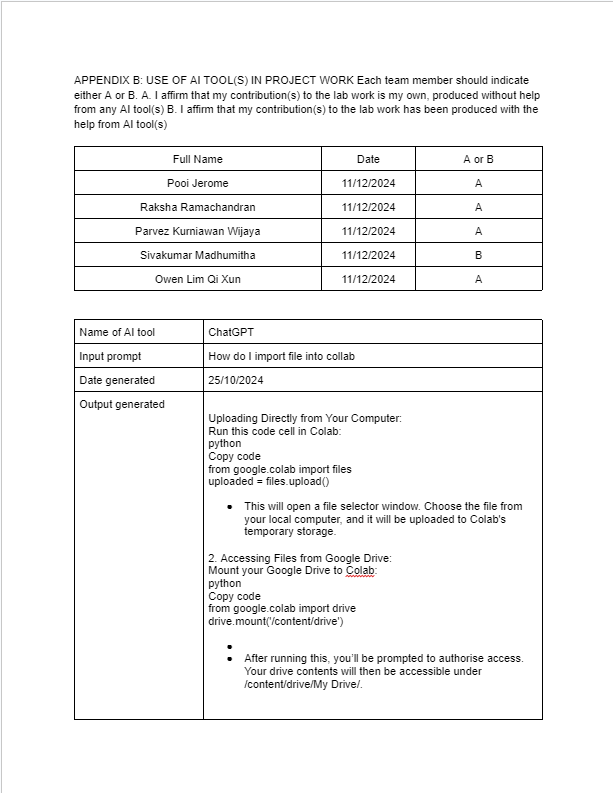

In [69]:
B1

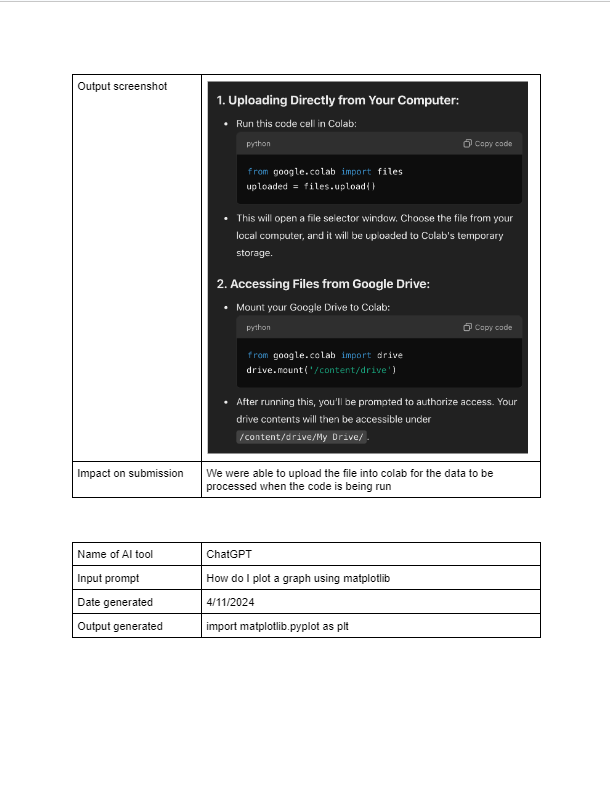

In [70]:
B2

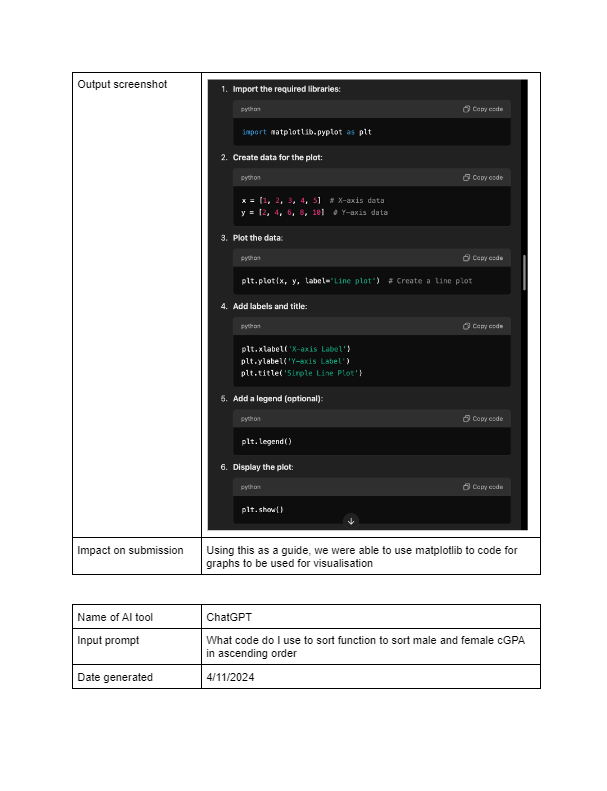

In [71]:
B3

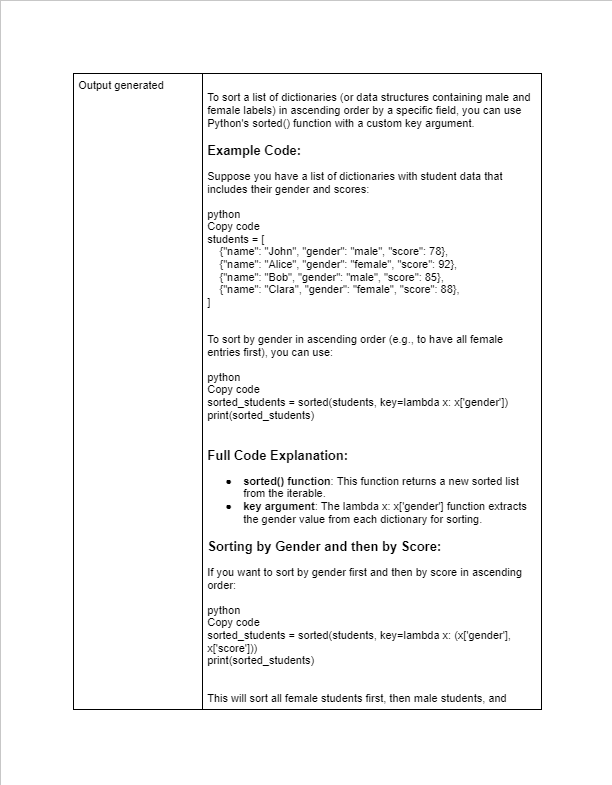

In [72]:
B4

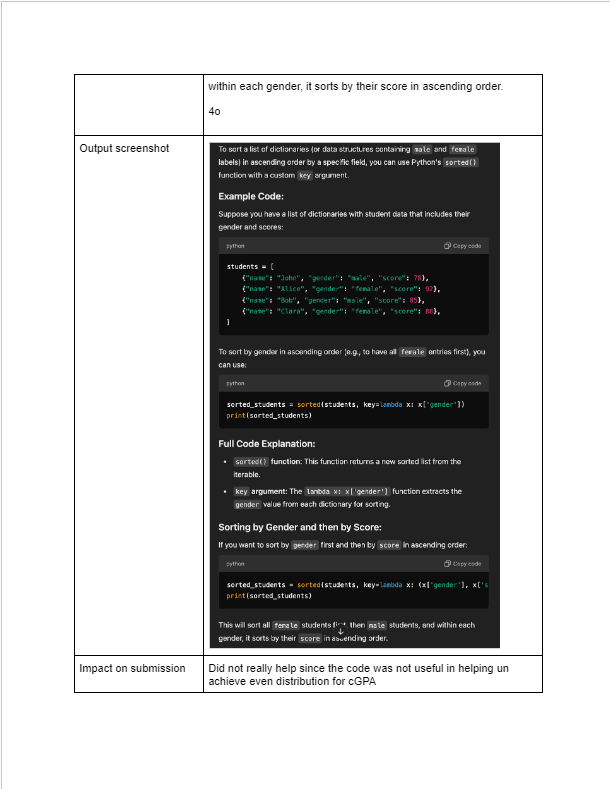

In [73]:
B5